In [9]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [11]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 42


In [13]:

import zipfile

path_to_zip = "NSL-KDD-V2.zip"
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("nsl_kdd_v2_data")

csv_path = "nsl_kdd_v2_data/NSL-KDD-V2.csv"
df = pd.read_csv(csv_path)
print("Loaded dataset shape:", df.shape)
df.head()


Loaded dataset shape: (167172, 64)


,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,SF_RSTO,SF_RSTOS0,SF_RSTR,SF_S0,SF_S1,SF_S2,SF_S3,SF_SF,SF_SH,label
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
2,0.0,1.681203e-07,6.223961e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neptune


In [15]:
print(df.columns)
print(df.dtypes)
print(df['label'].value_counts())


Index(['0', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18',
       '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4',
       '0.00.5', '150', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7',
       '0.00.8', '0.05', '0.00.9', '20', 'tcp_icmp', 'tcp_tcp', 'tcp_udp',
       'ftp_data_domain_u', 'ftp_data_eco_i', 'ftp_data_ecr_i',
       'ftp_data_finger', 'ftp_data_ftp_data', 'ftp_data_http',
       'ftp_data_other', 'ftp_data_private', 'ftp_data_smtp',
       'ftp_data_telnet', 'SF_OTH', 'SF_REJ', 'SF_RSTO', 'SF_RSTOS0',
       'SF_RSTR', 'SF_S0', 'SF_S1', 'SF_S2', 'SF_S3', 'SF_SF', 'SF_SH',
       'label'],
      dtype='object')
0        float64
491      float64
0.1      float64
0.2      float64
0.3      float64
          ...   
SF_S2    float64
SF_S3    float64
SF_SF    float64
SF_SH    float64
label     object
Length: 64, dtype: object
label
normal             67342
neptun

In [17]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Categorical columns: ['label']


In [19]:
if 'label' in df_encoded.columns:
    X = df_encoded.drop('label', axis=1)
    y = df_encoded['label']
else:
    X = df_encoded.copy()
    y = None


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)


In [27]:
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_scaled)


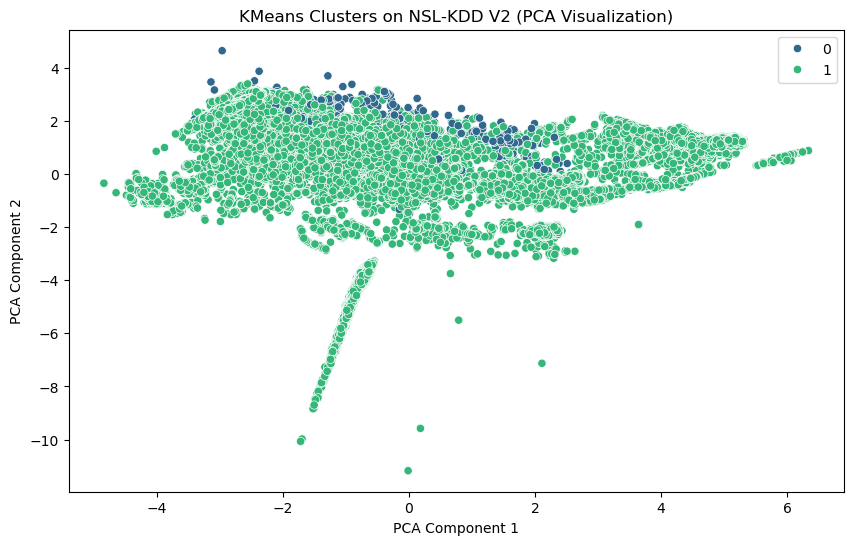

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', legend='full')
plt.title("KMeans Clusters on NSL‑KDD V2 (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
